In [61]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [46]:
df=pd.read_csv("train.csv")
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [47]:
len(df.ADDRESS.unique()) #no of unique address


6899

In [48]:
len(df.LONGITUDE.unique())

4087

In [49]:
len(df.LATITUDE.unique())

4078

In [50]:

df['ADDRESS'] = df['ADDRESS'].apply(lambda x: x.split(','))

In [51]:
df['ADDRESS']=df['ADDRESS'].apply(lambda x: x[-1])

In [52]:
len(df['ADDRESS'].unique())

256

In [53]:
#dropping latitude and longitude to save time 
df=df.drop(['LONGITUDE','LATITUDE'],axis=1)

In [54]:

len(df[df['BHK_OR_RK'] == 'RK'])

24

this will create hindrance in dataset so removing it also

In [56]:
df=df[df['BHK_OR_RK']=='BHK']
df=df.drop(['BHK_OR_RK'],axis=1)


NOW converting all city names in lower case so it would make easy in preprocessing and encoding 

In [57]:
df['ADDRESS']=df['ADDRESS'].apply(lambda x: x.lower())

#eda 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 2.2+ MB


In [28]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,30000.000000


In [64]:
target='TARGET(PRICE_IN_LACS)'
num_cat_col=[]
for col in df.select_dtypes(include='int64'):
    if(col!=target):
        print(f"{col:20} ----> {df[col].nunique():10} unique values")
        num_cat_col.append(col)
num_cat_col

UNDER_CONSTRUCTION   ---->          2 unique values
RERA                 ---->          2 unique values
BHK_NO.              ---->         16 unique values
READY_TO_MOVE        ---->          2 unique values
RESALE               ---->          2 unique values


['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'READY_TO_MOVE', 'RESALE']

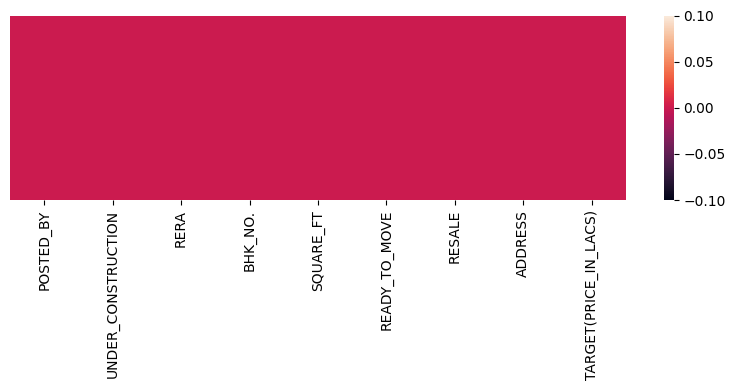

In [65]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

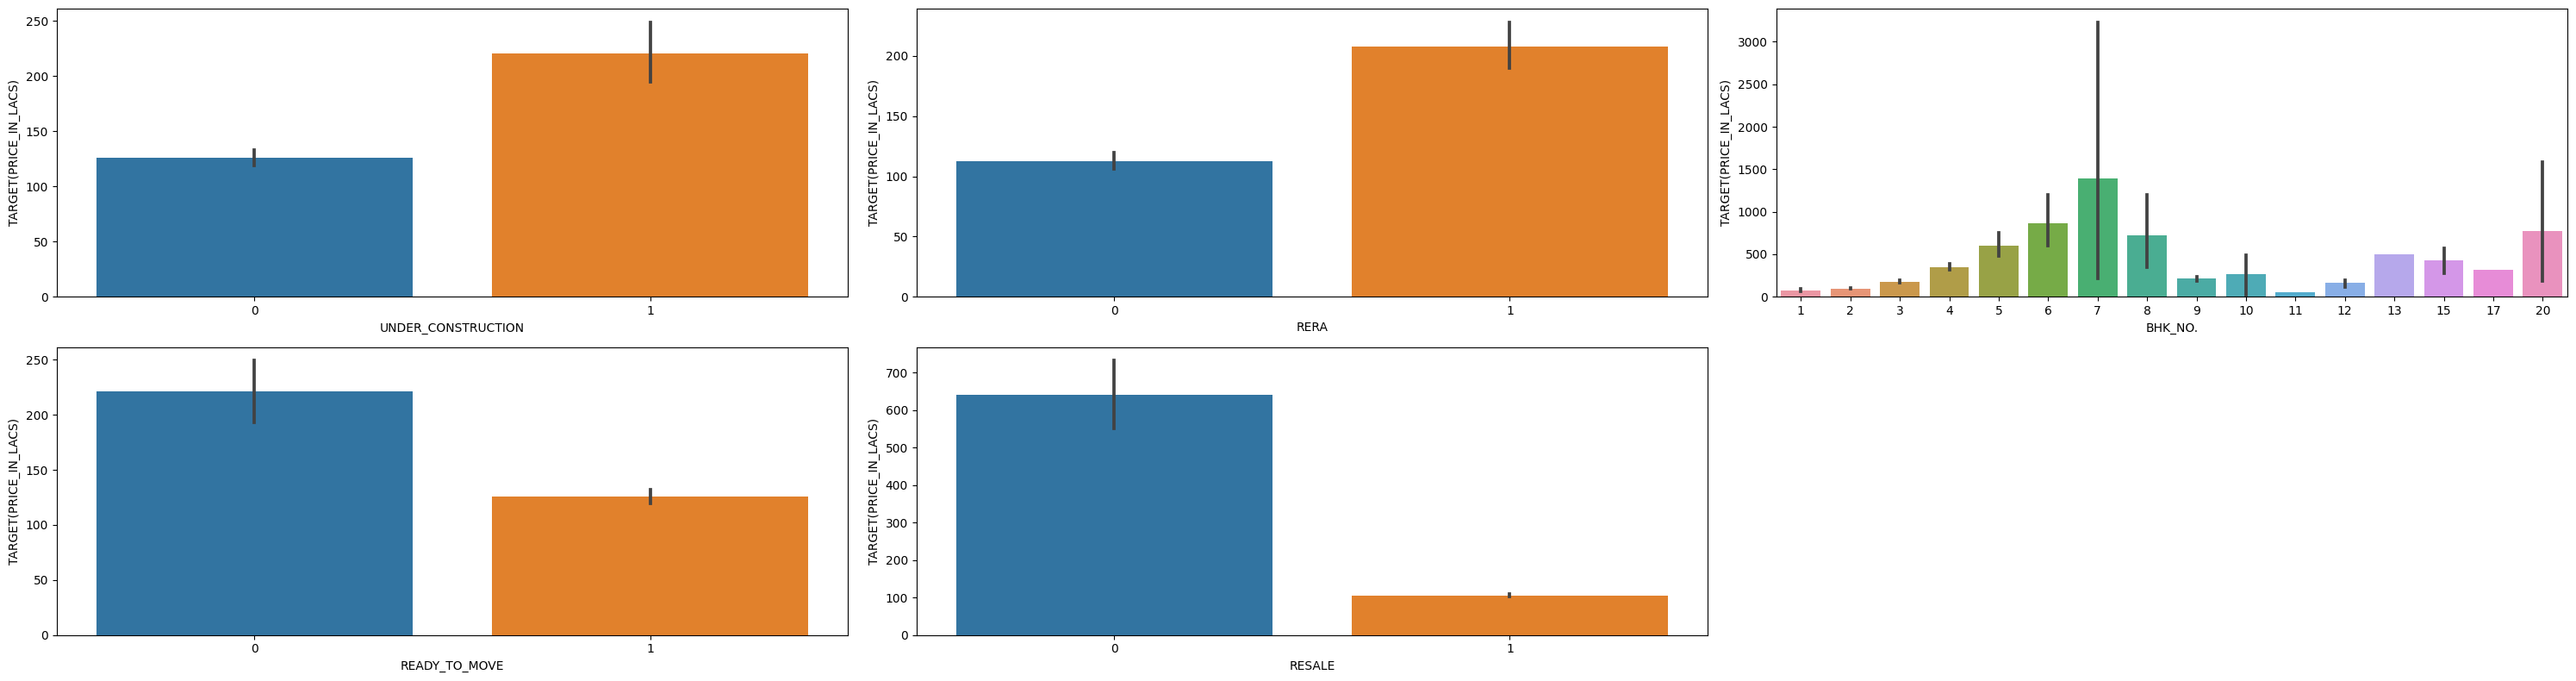

In [66]:
plt.figure(figsize=(30,8))
j=1
for columns in num_cat_col:
    plt.subplot(2,3,j)
    sns.barplot(y=target,x=columns,data=df)
    j+=1
plt.tight_layout()

#Data Preprocess Pipeline

In [68]:
from sklearn.preprocessing import LabelEncoder
import pickle as pkl 

In [72]:
lecity=LabelEncoder()
lepostby=LabelEncoder()
df['ADDRESS']=lecity.fit_transform(df['ADDRESS'])
df['POSTED_BY']=lepostby.fit_transform(df['POSTED_BY'])
pkl.dump(lecity, open('address.pkl','wb'))
pkl.dump(lepostby, open('postby.pkl','wb'))





In [73]:
from sklearn.model_selection import train_test_split

In [74]:
y=df[[target]]
X=df.drop([target],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=108)

WE will implement two famous model's
1.) XGB REGRESSOR 
2.) LGBM regressor

In [96]:
from xgboost import XGBRegressor

from lightgbm import LGBMRegressor
from sklearn.metrics import   r2_score

In [97]:
xgb = XGBRegressor(n_estimators=200,learning_rate=0.1,n_jobs=-1)

In [98]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [122]:
y_pred = xgb.predict(X_test) # storing test result 

In [123]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


In [124]:
 xgberror =mse
 xgbr2 =r2_score(y_test,y_pred)

In [125]:
lgbm=LGBMRegressor(n_estimators=200,learning_rate=0.1,n_jobs=-1)

In [126]:
lgbm.fit(X_train, y_train)

LGBMRegressor(n_estimators=200)

In [127]:
y_pred = lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
lgbr2=r2_score(y_test,y_pred)


In [128]:
lgbmse =mse

In [129]:
print(" the prediction is as follows ")
print ("lgbm mse and r2 score are "+str(lgbmse)+str(lgbr2))
print("rgb mse and r2 score are "+str(xgberror)+str(xgbr2))

 the prediction is as follows 
lgbm mse and r2 score are 137025.67835103290.756661687358937
rgb mse and r2 score are 134253.35483366940.7615849436049826


###Here Rgb is the winner so we will use it for prediction  

In [131]:
pkl.dump(xgb, open('modelprice.pkl','wb'))